In [1]:
import pandas as pd
import numpy as np
# plotting modules
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

matric_df = pd.read_csv("matric.csv")

matric_df.tail(10)

,emis,exam_no,school,dinaledi,quintile,_2014_pass_rate,_2014_achieved,_2014_wrote,_2013_pass_rate,_2013_achieved,_2013_wrote,_2012_pass_rate,_2012_achieved,_2012_wrote
990,440506232,3181006,Diphetoho Senior Secondary,N,1.0,86.5,32,37,71.4,45.0,63.0,78.9,30.0,38.0
991,444712129,3181063,Edmund Rice,N,NaN,96.2,25,26,89.7,26.0,29.0,76.9,10.0,13.0
992,444712056,3182008,Ed-U-College Welkom Ci/S,N,NaN,76.0,19,25,67.9,36.0,53.0,66.7,36.0,54.0
993,442908251,3181008,Eldoret Senior Secondary,N,3.0,71.0,44,62,67.8,40.0,59.0,76.6,36.0,47.0
994,444712076,3182010,Goudveld Senior Secondary,N,5.0,97.4,151,155,99.4,174.0,175.0,97.8,132.0,135.0
995,440808282,3181009,Hanover C F S,N,1.0,37.5,6,16,73.3,11.0,15.0,100.0,13.0,13.0
996,444412077,3182011,Harmonie Senior Secondary,N,5.0,94.7,72,76,91.6,76.0,83.0,82.8,77.0,93.0
997,441912078,3182013,Hennenman Senior Secondary,N,5.0,97.8,45,46,95.7,45.0,47.0,91.7,44.0,48.0
998,444412079,3182014,Hentie Cilliers H S,N,5.0,96.2,128,133,96.9,94.0,97.0,92.6,112.0,121.0
999,442008297,3181010,Hoopstad Combined,N,5.0,100.0,25,25,100.0,20.0,20.0,100.0,17.0,17.0


## Data Cleaning

In [2]:
# get the number of missing data points per column
missing_values_count = matric_df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[:]

emis                0
exam_no             0
school              0
dinaledi            0
quintile           72
_2014_pass_rate     0
_2014_achieved      0
_2014_wrote         0
_2013_pass_rate    26
_2013_achieved     26
_2013_wrote        26
_2012_pass_rate    44
_2012_achieved     44
_2012_wrote        44
dtype: int64

In [3]:
# Dropping exam_no already have emis as unique identifier
matric_df.drop(['exam_no'] ,axis=1, inplace=True)

<AxesSubplot:>

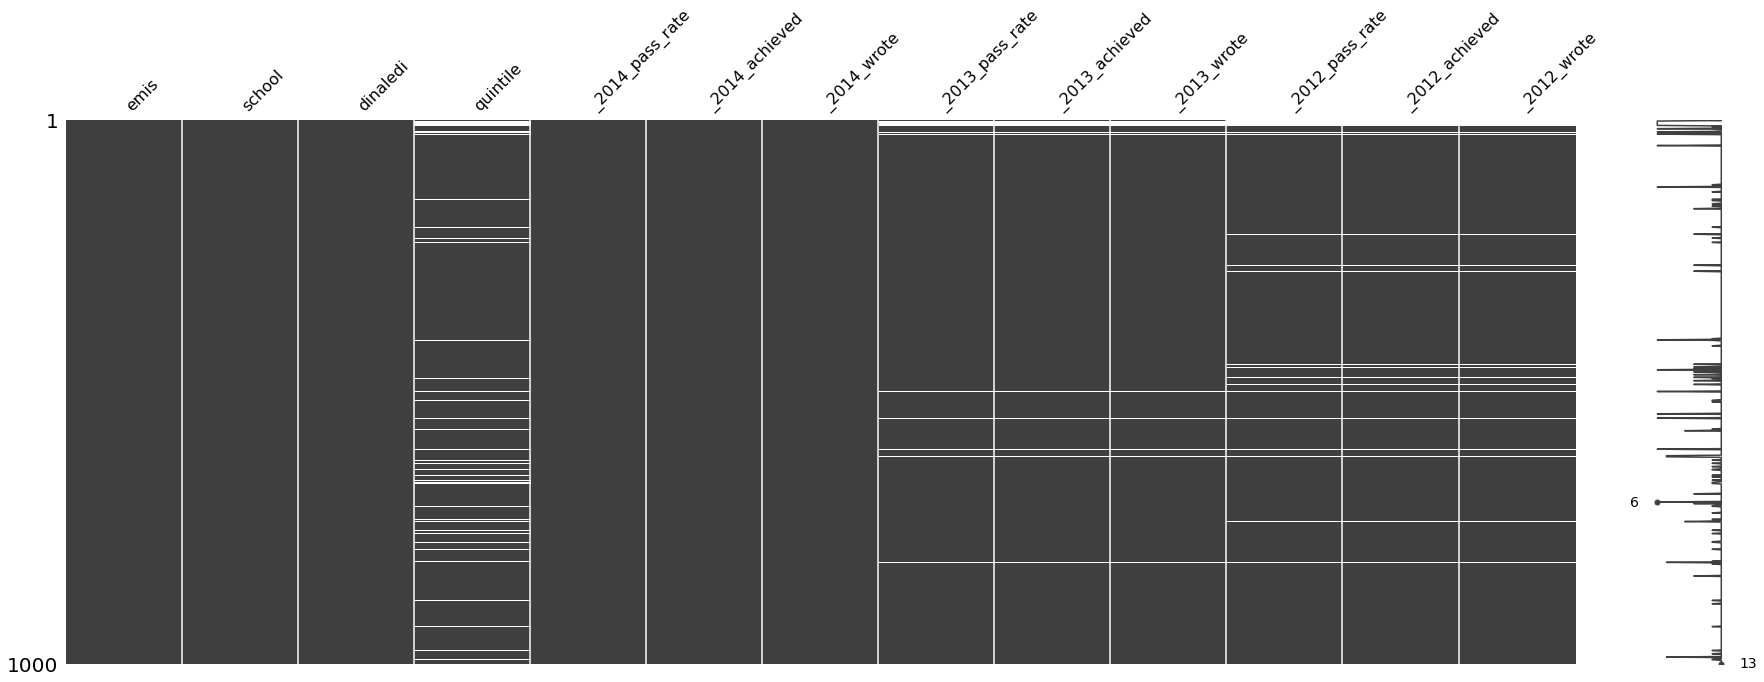

In [4]:
# Plot graphic of missing values
missingno.matrix(matric_df, figsize = (30,10))

In [6]:
#Dropping records with missing data
matric_df = matric_df.dropna(axis=0, subset=['_2012_wrote'])
matric_df = matric_df.dropna(axis=0, subset=['quintile'])

In [7]:
matric_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 1 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   emis             907 non-null    int64  
 1   school           907 non-null    object 
 2   dinaledi         907 non-null    object 
 3   quintile         907 non-null    float64
 4   _2014_pass_rate  907 non-null    float64
 5   _2014_achieved   907 non-null    int64  
 6   _2014_wrote      907 non-null    int64  
 7   _2013_pass_rate  907 non-null    float64
 8   _2013_achieved   907 non-null    float64
 9   _2013_wrote      907 non-null    float64
 10  _2012_pass_rate  907 non-null    float64
 11  _2012_achieved   907 non-null    float64
 12  _2012_wrote      907 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 99.2+ KB


In [8]:
# Converting Quintile column to integer
matric_df['quintile'] = matric_df['quintile'].astype(int)

What type of data do we have?

1. emis                [nteger] [Categorical] Unique school identifier
2. exam_no             [nteger] [Categorical] Unique exam identifier
3. school              [string] [Categorical] Name of school
4. dinaledi            [string] [Categorical] Is the schoold part of Dinaledi development programme
5. quintile            [integer][Categorical] Classification according to school's prehistoric available resources
6. _2014_pass_rate     [double] [Continuous] 2014 Pass rate
7. _2014_achieved      [integer][Continuous] How many students passed
8. _2014_wrote         [integer][Continuous] How many students wrote
9. _2013_pass_rate     [double] [Continuous] 2013 Pass rate
10. _2013_achieved     [double] [Continuous] How many students passed
11. _2013_wrote        [double] [Continuous] How many students wrote
12. _2012_pass_rate    [double] [Continuous] 2012 Pass rate
13. _2012_achieved     [double] [Continuous] How many students passed
14. _2012_wrote        [double] [Continuous] How many students wrote

## Exploration

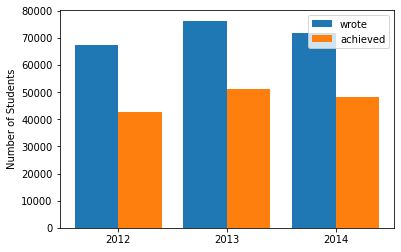

In [15]:

x = [2012,2013,2014]
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, matric_df[['_2012_wrote','_2013_wrote','_2014_wrote']].sum(), 0.4, label = 'wrote')
plt.bar(x_axis + 0.2, matric_df[['_2012_achieved','_2013_achieved','_2014_achieved']].sum(), 0.4, label = 'achieved')
plt.xticks(x_axis, x)
plt.ylabel("Number of Students")
plt.legend()
plt.show()

The number of students who wrote decreased in the year 2014 compared to the previous year. We also note the ratio of those who achieved to those who wrote has been relatively constant which is alarming

Text(0.5, 1.0, 'Quintile Schools')

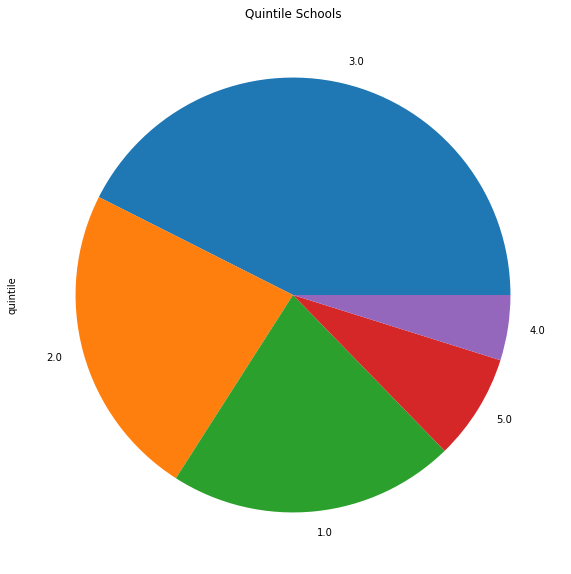

In [16]:
# Looking at quantile school distribution
matric_df.quintile.value_counts().plot(figsize =  (10,10), kind = 'pie')
plt.title('Quintile Schools')

We note there are more schools from previously disadvantaged back grounds

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

<AxesSubplot:xlabel='quintile', ylabel='_2012_pass_rate'>

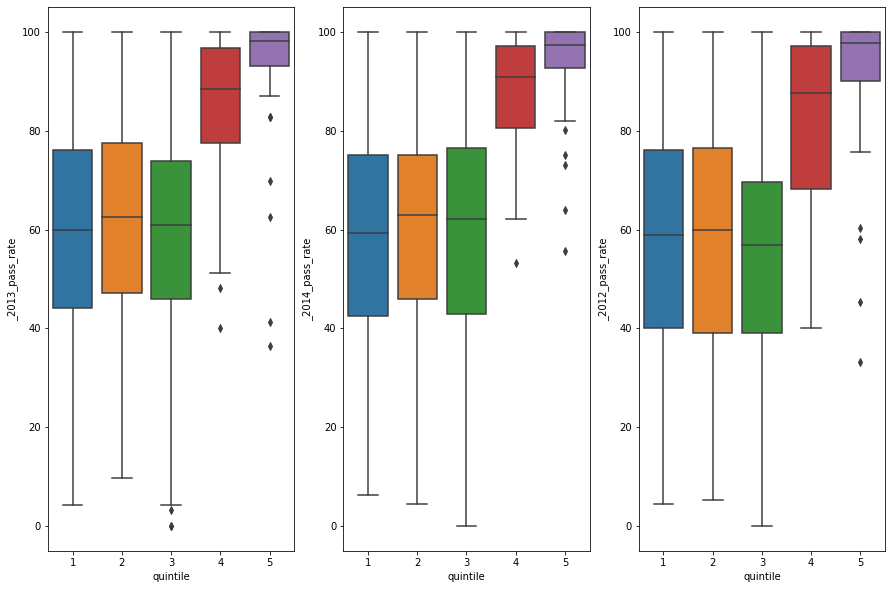

In [73]:
# Boxplot of pass rate and quintil
fig, ax=plt.subplots(1,3,figsize=(15,10))
sns.boxplot('quintile', '_2013_pass_rate', data = matric_df,ax=ax[0])
sns.boxplot('quintile', '_2014_pass_rate', data = matric_df,ax=ax[1])
sns.boxplot('quintile', '_2012_pass_rate', data = matric_df,ax=ax[2])

We note from the above three boxplots for all three years results have not changes by any significant amount for all 
quintile classifications.

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

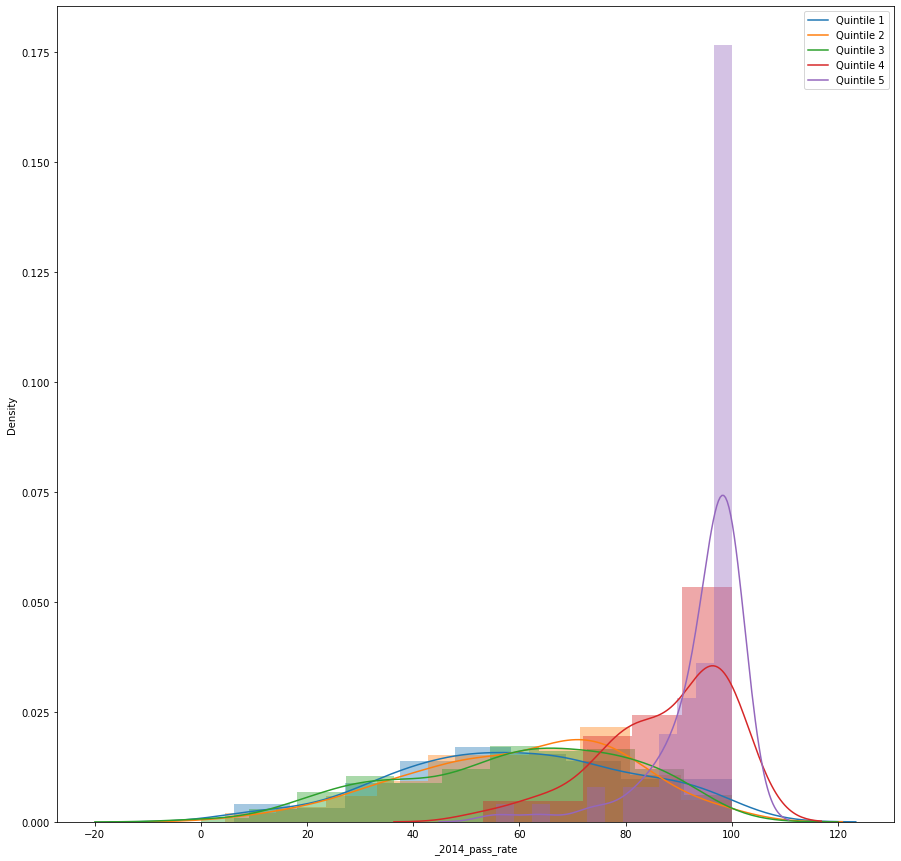

In [16]:
fig, ax=plt.subplots(figsize=(15,15))
sns.distplot(matric_df.loc[matric_df['quintile'] == 1]['_2014_pass_rate'], kde_kws={'label': 'Quintile 1'});
sns.distplot(matric_df.loc[matric_df['quintile'] == 2]['_2014_pass_rate'], kde_kws={'label': 'Quintile 2'});
sns.distplot(matric_df.loc[matric_df['quintile'] == 3]['_2014_pass_rate'], kde_kws={'label': 'Quintile 3'});
sns.distplot(matric_df.loc[matric_df['quintile'] == 4]['_2014_pass_rate'], kde_kws={'label': 'Quintile 4'});
sns.distplot(matric_df.loc[matric_df['quintile'] == 5]['_2014_pass_rate'], kde_kws={'label': 'Quintile 5'});

plt.legend()
plt.show()

We can see from the distribution that quintile 4 and 5 schools are concertrated on 90-100% pass rate for the year 2014 while the lower quintile schools have bell distribution peaking at 60% rate 

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seabor

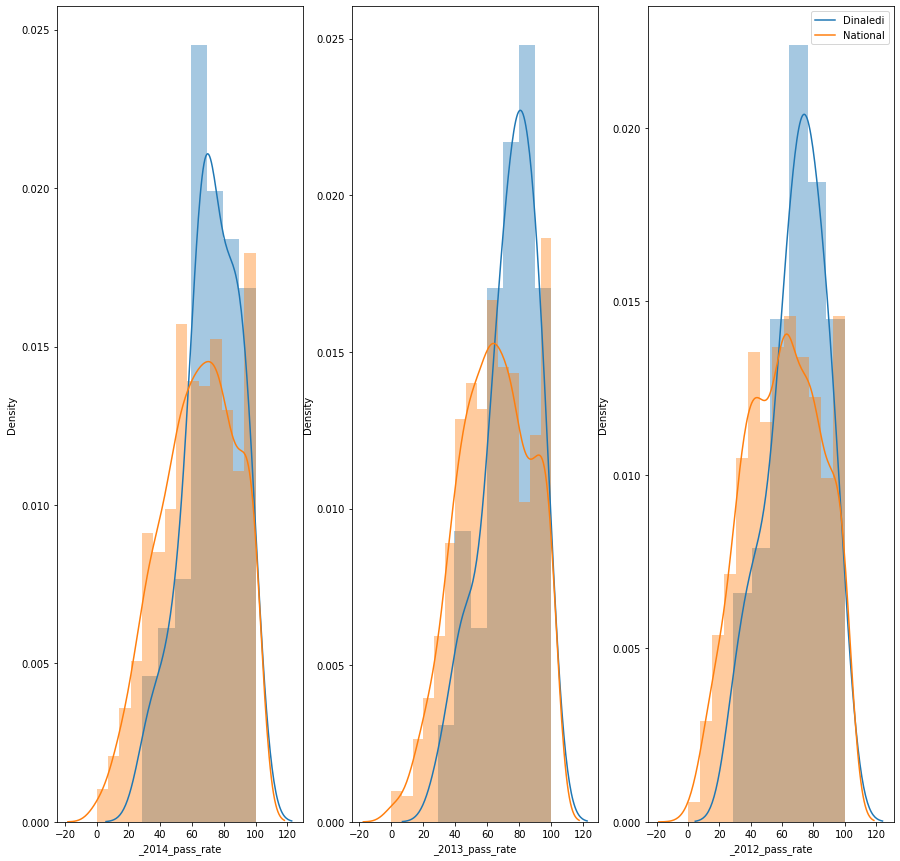

In [4]:



fig, ax=plt.subplots(1,3,figsize=(15,15))
sns.distplot(matric_df.loc[matric_df['dinaledi'] == 'Y']['_2014_pass_rate'], kde_kws={'label': 'Dinaledi 2014'},ax=ax[0]);
sns.distplot(matric_df.loc[matric_df['dinaledi'] == 'N']['_2014_pass_rate'], kde_kws={'label': 'National 2014'},ax=ax[0]);
plt.legend()
sns.distplot(matric_df.loc[matric_df['dinaledi'] == 'Y']['_2013_pass_rate'], kde_kws={'label': 'Dinaledi 2013'},ax= ax[1]);
sns.distplot(matric_df.loc[matric_df['dinaledi'] == 'N']['_2013_pass_rate'], kde_kws={'label': 'National 2013'},ax= ax[1]);
plt.legend()
sns.distplot(matric_df.loc[matric_df['dinaledi'] == 'Y']['_2012_pass_rate'], kde_kws={'label': 'Dinaledi'},ax= ax[2]);
sns.distplot(matric_df.loc[matric_df['dinaledi'] == 'N']['_2012_pass_rate'], kde_kws={'label': 'National'},ax= ax[2]);
plt.legend()


We see the Dinaedi programme is effective as dinaledi chools are consistently exceeding the national pass rate average for all three years